In [939]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [940]:
#Loading the dataset
column_names=['airline', 
              'length_flight_miles', 
              'speed_plane', 
              'daily_flight_time', 
              'population_served', 
              'total_operating_cost', 
              'revenue',
              'ton_mile_load_factor',
              'avail_capacity', 
              'total_assets', 
              'investements_special_funds', 
              'adjusted_assets']


df_airline_cost = pd.read_csv('~/IMT_574/Week2/Homework/airline_costs.csv', names = column_names, header = None)

In [941]:
data_for_model = df_airline_cost[['length_flight_miles', 'daily_flight_time', 'population_served']].copy()

In [942]:
data_for_model['constant'] = 1

In [943]:
simple_model = sm.OLS(data_for_model.population_served, data_for_model.drop('population_served', axis = 1))

model = simple_model.fit()

In [944]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      population_served   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     23.00
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.23e-06
Time:                        14:29:44   Log-Likelihood:                -330.06
No. Observations:                  31   AIC:                             666.1
Df Residuals:                      28   BIC:                             670.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
length_flight_miles   183.2956     30.414      6.027      0.000     120.995     245.596
daily_flight_time    -213.3340   1436.955     -0.148      0.883   -3156.803    2730.134
constant            -7792.0706   8396.998     -0.928      0.361    -2.5e+04    9408.401
==============================================================================
Omnibus:                        2.469   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.851
Skew:                           0.598   Prob(JB):                        0.396
Kurtosis:                       2.931   Cond. No.                         653.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [945]:
#predictors=[[200, 7.2, 1]]

In [946]:
length_flight= 200
daily_flight_time = 7.2
ts = pd.Series([length_flight, daily_flight_time, 1])
ynewpred =  model.predict(ts) # predict out of sample
print(ynewpred)

None    27331.034617
dtype: float64


In [947]:
ynewpred

None    27331.034617
dtype: float64

/var/folders/cq/0jb064816rn07k67cjcpfx700000gn/T/ipykernel_1636/1457227749.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Z_axis = model.params[0] + model.params[1] * X_axis + model.params[2] * Y_axis


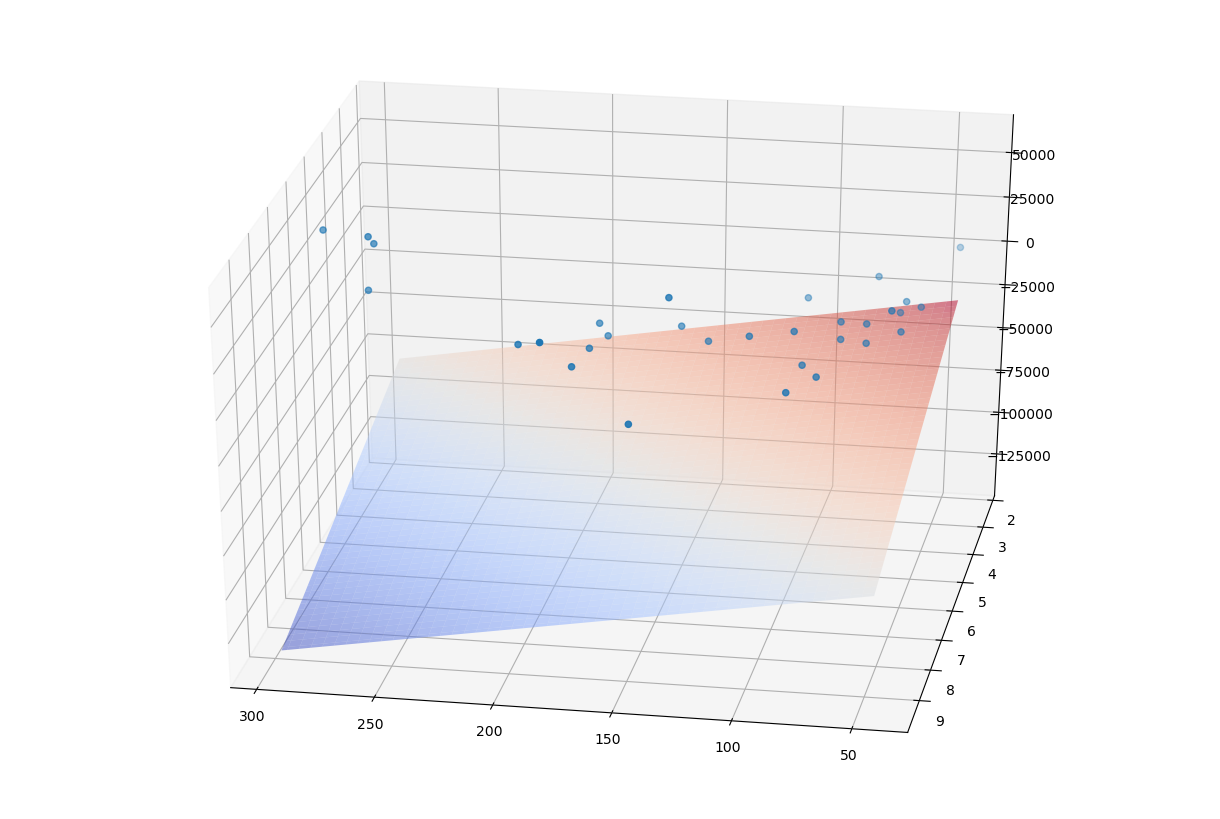

In [955]:
from mpl_toolkits.mplot3d import Axes3D

    # Figure out X and Y axis using ranges from TV and Radio
X_axis, Y_axis = np.meshgrid(np.linspace(data_for_model.length_flight_miles.min(), data_for_model.length_flight_miles.max(), 100),
np.linspace(data_for_model.daily_flight_time.min(), data_for_model.daily_flight_time.max(), 100))
    
    # Plot the hyperplane by calculating corresponding Z axis (Sales)
Z_axis = model.params[0] + model.params[1] * X_axis + model.params[2] * Y_axis

    # Create matplotlib 3D axes
fig = plt.figure(figsize=(12, 8))# figsize refers to width and height ofthe figure
ax = Axes3D(fig, azim=100)
    
    # Plot hyperplane
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap=plt.cm.coolwarm, alpha=0.5,
linewidth=0)
    
    # Plot data points
ax.scatter(data_for_model.length_flight_miles, data_for_model.daily_flight_time, data_for_model.population_served)

    # set axis labels
# ax.set_xlabel(x_label)
# ax.set_ylabel(y_label)
# ax.set_zlabel(z_label)